In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("df_updated.csv")
df.rename(columns={"clk": "click"},inplace=True)

In [5]:
#adgroup_id cate_id price ändern sich doch -> entfernen
#Alles zu ints casten, damit Häufigkeiten betrachtet werden können
df.drop(columns=["adgroup_id","cate_id","price"],inplace=True)
df['click'] = df['click'].astype(int)
df['final_gender_code'] = df['final_gender_code'].astype(int)
df['age_level'] = df['age_level'].astype(int)
df['shopping_level'] = df['shopping_level'].astype(int)
df['occupation'] = df['occupation'].astype(int)

In [6]:
df.head()

,user,time_stamp,click,brand,final_gender_code,age_level,shopping_level,occupation,time_idx
0,7,2017-05-07 07:44:12,0,402360.0,1,2,3,0,0
1,7,2017-05-07 07:46:36,0,429159.0,1,2,3,0,1
2,7,2017-05-07 23:15:38,0,402360.0,1,2,3,0,2
3,7,2017-05-07 23:16:54,0,252916.0,1,2,3,0,3
4,7,2017-05-08 02:16:42,0,429159.0,1,2,3,0,4


In [7]:
df['click'] = df['click'].astype(int)
click_counts = df.groupby('brand')['click'].sum().sort_values(ascending=False)
click_counts_relative = (df.groupby('brand')['click'].sum().sort_index() / df['brand'].value_counts().sort_index()).sort_values(ascending=False)
df['click'] = df['click'].astype(str)

In [8]:
click_counts_relative.describe()

count    488.000000
mean       0.046693
std        0.019897
min        0.000000
25%        0.033536
50%        0.044904
75%        0.057337
max        0.224806
dtype: float64

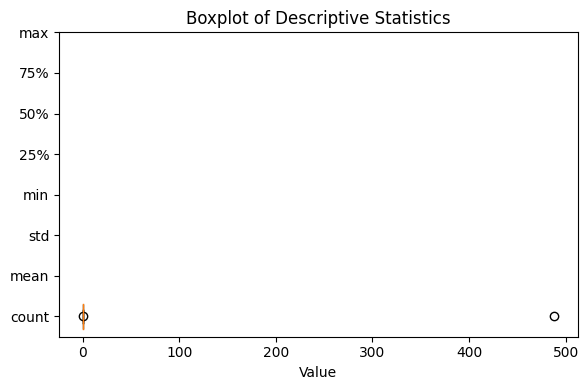

In [14]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual statistics)
data = {
    'count': 488.000000,
    'mean': 0.046693,
    'std': 0.019897,
    'min': 0.000000,
    '25%': 0.033536,
    '50%': 0.044904,
    '75%': 0.057337,
    'max': 0.224806,
}

# Create a list of labels and a list of values
labels = list(data.keys())
values = list(data.values())

# Create a boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(values, vert=False, widths=0.6, patch_artist=True)

# Set labels and title
plt.yticks(range(1, len(labels) + 1), labels)
plt.xlabel('Value')
plt.title('Boxplot of Descriptive Statistics')

# Display the plot
plt.tight_layout()
plt.show()


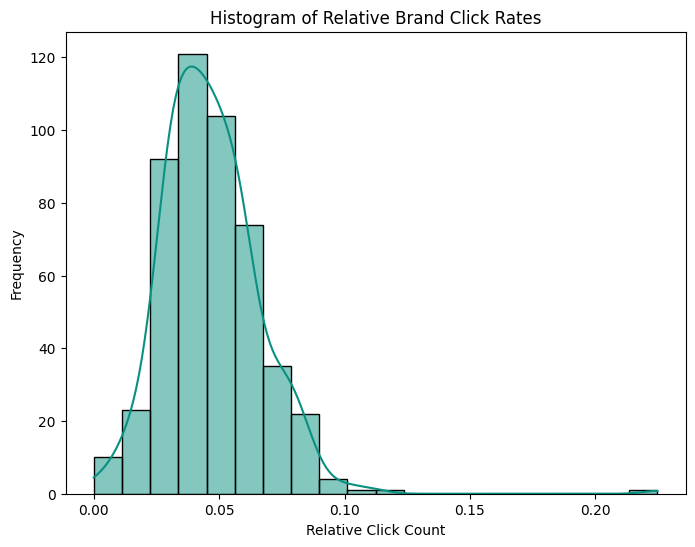

In [29]:
color_palette = ["#089081", "#CBDDD8"]
plt.figure(figsize=(8, 6))
sns.histplot(click_counts_relative, bins=20, kde=True, color=color_palette[0])
plt.title('Histogram of Relative Brand Click Rates')
plt.xlabel('Relative Click Count')
plt.ylabel('Frequency')
plt.savefig('hist.png', dpi=1000)
plt.show()


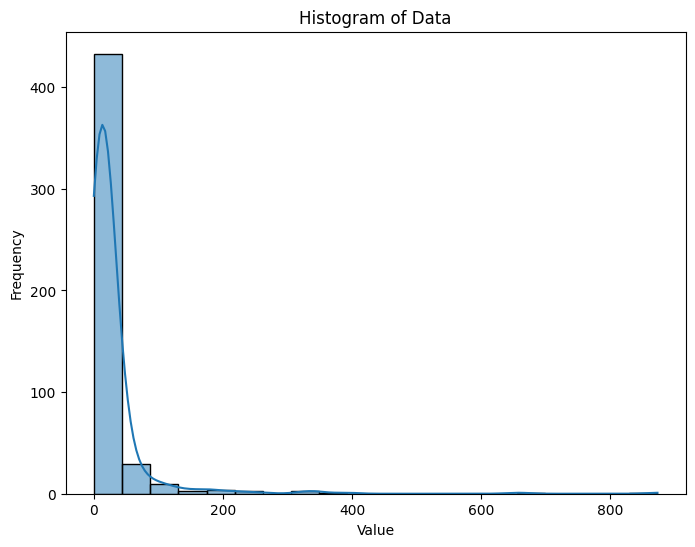

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(click_counts, bins=20, kde=True)
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [19]:
click_counts_relative.describe()

count    488.000000
mean       0.046693
std        0.019897
min        0.000000
25%        0.033536
50%        0.044904
75%        0.057337
max        0.224806
dtype: float64

<Axes: >

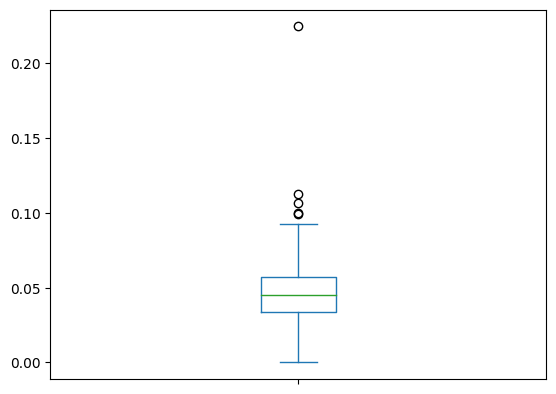

In [18]:
click_counts_relative.plot.box()

In [9]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['brand'], df['click'])

# Calculate the chi-square statistic and p-value
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
num_obs = np.sum(contingency_table)
cramers_v = np.sqrt(chi2 / (num_obs * min(contingency_table.shape) - 1))

print(f"Cramér's V: {cramers_v}")

Cramér's V: click
0    0.050020
1    0.224532
dtype: float64


In [13]:
from dython.nominal import theils_u

# Calculate Theil's U
theil_u_value = theils_u(df['brand'], df['click'])
print(f"Theil's U: {theil_u_value}")


Theil's U: 0.0004414581187174273


In [12]:
from dython.nominal import associations
theil_u = associations(df['brand'], df['click'], nominal_columns=True)['TheilU'].iloc[0, 1]
print(f"Theil's U: {theil_u}")


TypeError: associations() got multiple values for argument 'nominal_columns'